# Created by Wenhan Hua

Mar. 7th 2023

The system Hamiltonian can be written as:

$$ H = H_{circuit} + H_{motion} + H_{int} $$

- $H_{circuit} $: the hamiltonian for the eletrical circuit

It can be buit as,

$$H_{circuit} = \frac{\Phi^2}{2L} + \frac{Q^2}{2C} = \frac{\Phi^2}{2L} + \frac{1}{2} L\Omega^2 Q^2 $$

(???)

with the LC resonator frequency $\Omega = 1/\sqrt{LC}$

- $H_{motions} $: the hamiltonian of the electron motion

$$ H_{motion} = \frac{p^2}{2m} + \frac{m}{2} W(t) x^2 $$

consider the full time-dependent trapping potential, 

$$ W(t) = \frac{\omega_{rf}^2}{4}[a_x + 2 q_x \cos(\omega_{rf} t)]$$

According to LBMW(Page 286, Equation 29). let $u(t)$ be the special solution, then the $x(t)$ and $p(t) $ can be reexpressed as

$$ x(t) = \sqrt{\frac{\hbar}{2m\nu}} \{ a u^*(t) + a^\dagger u(t)\} $$

$$ p(t) = \sqrt{\frac{\hbar m}{2\nu}} \{a \dot{u}^*(t) + a^\dagger \dot{u}(t)\} $$

Under the lowest order approximation of the solution of the Mathieu equation:

$$ \frac{d^2 x}{d\xi^2} + [a_x - 2q_x\cos(2\xi)] x = 0$$

is given by:

$$ u(t) = u_0 e^{ i\frac{\beta_u\omega_{rf} t}{2}}(1 - \frac{q_u}{2}\cos(\omega_{rf} t)) $$

- $H_{int}$: interaction hamiltonian between the two(damping force)

Interaction is given by:

$$ H_{int} = qU(r) $$

where $U(r) $ is the potential around the trapping position as 
$$ U(r_i) = U(0) + \frac{Q}{C} [(r_i / D_{1,i}) + s_i (r_i / D_{2,i})^2 + O(r^3)] $$

Where $Q$ is the charge on the resonator's capacitance board, $D_{1, i}$ is the effective distance

Let's focus on the linear term:

$$ \frac{q}{C D_{1,i}} Q x = \frac{q}{C D_{1,i}} x_0 Q_0 (a_\phi e^{-i \Omega t} + a_\phi^\dagger e^{+i \Omega t}) [a_x e^{- i\nu t}(1-\frac{q_u}{2}\cos(\omega_{rf} t)) +  a_x^\dagger e^{+ i\nu t}(1-\frac{q_u}{2}\cos(\omega_{rf} t)) ]$$

with $x_0 = \sqrt{\frac{\hbar}{2m\nu}}$ and $ Q_0 = \sqrt{\frac{\hbar}{2L\Omega}} $, $\Omega$ is the resonator frequency

After doing the rotating wave approximation , consider there is only coupling in the x direction ($u = x$) and neglect the second order term(the parametric coupling term).we find two resonaces: 

1. When $\Omega = \omega_{rf} - \nu$, 
$$ <H_{int}> = - \frac{q q_x x_0 Q_0}{4 C D_{1,i}}[a_\phi a_x + a_\phi^\dagger a_x^\dagger] $$

2. When $\Omega = \omega_{rf} + \nu$,

$$ <H_{int}> = - \frac{q q_x x_0 Q_0}{4 C D_{1,i}}[a_\phi a_x^\dagger + a_\phi^\dagger a_x] $$

3. When $\Omega = \nu$,

$$ <H_{int}> = \frac{q x_0 Q_0}{C D_{1,i}}[a_\phi a_x^\dagger + a_\phi^\dagger a_x] $$

This problem is similar to the The Lindblad Master equation

https://qutip.org/docs/latest/guide/dynamics/dynamics-master.html#the-lindblad-master-equation

The evolution of a quantum system is governed by the von Neumann equation:

$$\dot{\rho}_{tot} (t) = - \frac{i}{\hbar}[H_{tot}, \rho_{tot}(t)] $$

the equivalent of the Schrödinger equation in the density matrix formalism, the total Hamiltonian is:

$$ H_{tot} = H_{sys} + H_{env} + H_{int} $$

In our case, $H_{sys} = H_{motion}$, $H_{env} = H_{circuit}$, $H_{int}$ is the coupling illustrated above.

we can at this point perform a partial trace over the environmental degrees of freedom, and thereby obtain a master equation for the motion of the original system density matrix. The most general trace-preserving and completely positive form of this evolution is the Lindblad master equation for the reduced density matrix $$\rho = Tr_{env}[\rho_{tot}] $$

The Lindblad master equation:

$$ \dot{\rho}(t) = - \frac{i}{\hbar} [H(t), \rho(t)] + \sum_n \frac{1}{2}[2 C_n \rho(t)C_n^\dagger - \rho(t) C_n^\dagger C_n - C_n^\dagger C_n \rho(t) ] $$

where the $C_n = \sqrt{\gamma_n} A_n $ are collapse operators,  $A_n $ are the operators through which the environment couples to the system in $H_{int}$
, and $\gamma$ are the corresponding rates. 

Note that the requirements to arrive at the master equation:

1. Separability: At $t=0$ there are no correlations between the system and its environment such that the total density matrix can be written as a tensor product  $\rho^I_{tot}(0) = \rho^I_{tot}(0) \bigotimes \rho^I_{env}(0) $

2. Born approximation: Requires: (1) that the state of the environment does not significantly change as a result of the interaction with the system; (2) The system and the environment remain separable throughout the evolution. These assumptions are justified if the interaction is weak, and if the environment is much larger than the system. In summary, $\rho_{tot}(t) = \rho_{tot}(t) \bigotimes \rho_{env} $

3. Markov approximation The time-scale of decay for the environment $\tau_{env}$ is much shorter than the smallest time-scale of the system dynamics $\tau_{sys}>>\tau_{env} $. This approximation is often deemed a “short-memory environment” as it requires that environmental correlation functions decay on a time-scale fast compared to those of the system.

4. Secular approximation Stipulates that elements in the master equation corresponding to transition frequencies satisfy |𝜔𝑎𝑏−𝜔𝑐𝑑|≪1/𝜏sys
, i.e., all fast rotating terms in the interaction picture can be neglected. It also ignores terms that lead to a small renormalization of the system energy levels. This approximation is not strictly necessary for all master-equation formalisms (e.g., the Block-Redfield master equation), but it is required for arriving at the Lindblad form (3) which is used in qutip.mesolve.

More specifically:

1. systems are not strongly coupled to their environment, the decay rates $\gamma_n$ be smaller than the minimum energy splitting in the system Hamiltonian.

2. systems with degenerate or nearly degenerate energy levels should be double checked

The deviation can be find here:
 
- https://arxiv.org/pdf/1110.2122.pdf

- https://aip.scitation.org/doi/10.1063/1.5115323

- https://en.wikipedia.org/wiki/Lindbladian

In [11]:
# Load the needed package
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import cmath
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import find_peaks

from scipy.integrate import solve_ivp
from decimal import *
from tqdm import tqdm
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy,
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay, mcsolve,
                   sigmaz, tensor, thermal_dm, Bloch, about, plot_expectation_values, fsesolve)
from qutip.ui.progressbar import BaseProgressBar, TextProgressBar


In [12]:
# Load the parameters 

# All in SI
wrf = 2 * np.pi* 10.6e9 # 10.6 GHz
wmm = 2 * np.pi* 10.6e9 # 10.6 GHz
wradial = 2 * np.pi * 2e9 # 2 GHz  
waxial = 2 * np.pi * 300e6 # 300 MHz
deff = 200e-6 # 200 micron
m = 9.10938297e-31 # 9.10938297e-31 kg 
q = 1.6e-19 # 1.6e-19 C

# Here are artical parameter
U = 5
VoverU = 160 
r0 = 0.01 # 0.01 m

# Here are the tank circuit
Rp = 1e9
Q = 2000

fres = 2.16e9
wres = 2 * np.pi * fres

kB = 1.380649e-23 # Boltzman constant, given by Wikipedia
Temperature = 0.4 # Temperature for the tank circuit, given by article
hbar = 1.05457182e-34
# Define the spatial step size and the time step size

dt = 1e-8 # time step size
T = 2e-6 # total time
N = round(T/dt)

t_eval = np.linspace(0, T, N + 1)
#t_eval = np.linspace(0, , 1e-10)
# Resonator Setup
Impedance = 1e8
Capacitance = 1 / Impedance / fres ** 2

# Motion initialization

x0, y0, z0, vx0, vy0, vz0 = 0.1e-6, 0.1e-6, 0.1e-6, 0., 0., 0.


$$\omega_{x,y} = \frac{qV}{\sqrt{2} m\Omega_{rf}r_0^2} $$

$$\omega_z = \sqrt{\frac{q\kappa U}{mr_0^2}} $$

by [littich-thesis.pdf-Page18](./littich-thesis.pdf) 

(??? Question: it is said $\omega_u = \sqrt{a_u + q_u^2/2}\; \Omega_{rf} /2 = \sqrt{(\frac{4qU}{mr_0^2\Omega^2}) + 2(\frac{qV}{mr_0^2\Omega^2})^2 }\;\Omega_{rf} /2 $ , so the last equation should only holds when $ a_u << (q_u)^2 $ )

and

$$ a_x = a_y = - \frac{1}{2}a_z = \frac{4qU}{mr_0^2 \Omega^2} $$

$$ q_x = -q_y = \frac{2qV}{mr_0^2 \Omega^2} $$

$$ q_z = 0 $$

So

$$ a_x = a_y =  - \frac{1}{2}a_z = \frac{4 \omega_z^2}{\kappa \Omega^2} $$

$$ q_x = - q_y = \frac{2\sqrt{2} \omega_{x, y}}{\Omega_{rf}} $$

**Note that things will be different in 2D quadrupole trap, see Littich-thesis Page18, Eq.s (2.49 - 2.52)**

In [13]:
# Pretreatment of the parameters

# expirically determined parameters
para_kappa = 2

para_ax = 4 * waxial ** 2 / para_kappa / wrf ** 2
para_ay = para_ax
para_az = - 2 * para_ax

para_qx = 2 * np.sqrt(2) * wradial / wrf
para_qy = - para_qx
para_qz = 0

para_betax = np.sqrt( para_ax + para_qx ** 2 / 2)
para_betay = np.sqrt( para_ay + para_qy ** 2 / 2)
para_betaz = np.sqrt( para_az + para_qz ** 2 / 2)



para_nux = para_betax * wrf / 2

para_X0 = np.sqrt(hbar / 2 / m / para_nux)
para_P0 = np.sqrt(hbar * m / 2 / para_nux)

# initial charge on the capacitance
para_Q0 = np.sqrt(hbar / 2 / Impedance / fres)


u0 = 0.01

# Build the hamiltonian of motion
# Reference: https://qutip.org/docs/latest/guide/guide-steady.html#example-harmonic-oscillator-in-thermal-bath
# Time-dep Dynamcis Reference: https://qutip.org/docs/latest/guide/dynamics/dynamics-time.html

def u(u0, t):
    return u0 * np.exp(1j * para_betax * wrf * t / 2) * (1 - para_qx / 2 * np.cos(wrf * t))

def dotu(u0, t):
    a = u0 * np.exp(1j * para_betax * wrf * t / 2) * para_qx * wrf / 2 * np.sin(wrf * t)
    b = u0 * np.exp(1j * para_betax * wrf * t / 2) * 1j * para_betax * wrf / 2 * (1 - para_qx / 2 * np.cos(wrf * t))
    return a + b

def W(t):
    return wrf ** 2 / 4 * (para_ax + 2 * para_qx * np.cos(wrf * t))

Hilbert_dim_phi = 2 ** 2
Hilbert_initial_phi = 1

Hilbert_dim_x = 2 ** 2
Hilbert_initial_x = 3

psi0 = tensor(fock(Hilbert_dim_phi,Hilbert_initial_phi), fock(Hilbert_dim_x, Hilbert_initial_x))
anni_phi = tensor(destroy(Hilbert_dim_phi), qeye(Hilbert_dim_x))
anni_x = tensor(qeye(Hilbert_dim_phi), destroy(Hilbert_dim_x))
anni_phi_anni_x = tensor(destroy(Hilbert_dim_phi), destroy(Hilbert_dim_x))
anni_phi_creat_x = tensor(destroy(Hilbert_dim_phi), create(Hilbert_dim_x))


C:\Users\electron\AppData\Local\Temp\ipykernel_19928\1321052101.py:16: RuntimeWarning: invalid value encountered in sqrt
  para_betaz = np.sqrt( para_az + para_qz ** 2 / 2)


$H_{int}$:
1. When $\Omega = \omega_{rf} - \nu$, 
$$ <H_{int}> = - \frac{q q_x x_0 Q_0}{4 C D_{1,i}}[a_\phi a_x + a_\phi^\dagger a_x^\dagger] $$

2. When $\Omega = \omega_{rf} + \nu$,

$$ <H_{int}> = - \frac{q q_x x_0 Q_0}{4 C D_{1,i}}[a_\phi a_x^\dagger + a_\phi^\dagger a_x] $$

3. When $\Omega = \nu$,

$$ <H_{int}> = \frac{q x_0 Q_0}{C D_{1,i}}[a_\phi a_x^\dagger + a_\phi^\dagger a_x] $$

In [14]:
# Build the Interaction hamiltonian(time dependence) with string form 

# Pre-factor 

str_H_int_prefactor = ' (q * para_Q0 * para_X0 / Capacitance / deff) * (1 + para_qx / 2 * cos(wrf * t)) / ( 1 + para_qx / 2)'


# Old Version
'''
# Time-dep Function before anni_phi_anni_x
str_H_int_aa = str_H_int_prefactor + ' * (exp(1j * t * (- fres - wradial)) \
    - para_qx / 4 * exp(1j * t * (- fres + wrf - wradial))\
    - para_qx / 4 * exp(1j * t * (- fres - wrf - wradial)))'

# Time-dep Function before anni_phi_create_x
str_H_int_aad = str_H_int_prefactor + ' * (exp(1j * t * (- fres + wradial)) \
    - para_qx / 4 * exp(1j * t * (- fres + wrf + wradial))\
    - para_qx / 4 * exp(1j * t * (- fres - wrf + wradial)))'

# Time-dep Function before create_phi_anni_x
str_H_int_ada = str_H_int_prefactor + ' * (exp(1j * t * (fres - wradial)) \
    - para_qx / 4 * exp(1j * t * (fres + wrf - wradial))\
    - para_qx / 4 * exp(1j * t * (fres - wrf - wradial)))'

# Time-dep Function before create_phi_create_x
str_H_int_adad = str_H_int_prefactor + ' * (exp(1j * t * (fres + wradial)) \
    - para_qx / 4 * exp(1j * t * (fres + wrf + wradial))\
    - para_qx / 4 * exp(1j * t * (fres - wrf + wradial)))'
'''
# New Verison
# Time-dep Function before anni_phi_anni_x
str_H_int_aa = str_H_int_prefactor + ' * exp( - 1j * t * (wres + wradial))'
# Time-dep Function before create_phi_anni_x
str_H_int_ada = str_H_int_prefactor + ' * exp( - 1j * t * (- wres + wradial))'
# Time-dep Function before anni_phi_create_x
str_H_int_aad = str_H_int_prefactor + ' * exp( - 1j * t * ( wres - wradial))'
# Time-dep Function before create_phi_create_x
str_H_int_adad = str_H_int_prefactor + ' * exp( - 1j * t * (- wres - wradial))'

constants = ["para_Q0", "para_X0", "Capacitance", "deff", "wradial","wres", "fres", "para_qx", "wrf", "q"]

# Important Details: Put complicated strings in the front
str_H_int_aa_numerical = str_H_int_aa
str_H_int_aad_numerical = str_H_int_aad
str_H_int_ada_numerical = str_H_int_ada
str_H_int_adad_numerical = str_H_int_adad

for c in constants:
    # replace constants with numerical value
    str_H_int_aa_numerical = str_H_int_aa_numerical.replace(c, str(eval(c)))
    str_H_int_aad_numerical = str_H_int_aad_numerical.replace(c, str(eval(c)))
    str_H_int_ada_numerical = str_H_int_ada_numerical.replace(c, str(eval(c)))
    str_H_int_adad_numerical = str_H_int_adad_numerical.replace(c, str(eval(c)))
    
H_int = [
    [ anni_phi * anni_x, str_H_int_aa_numerical],
    [ anni_phi * anni_x.dag(), str_H_int_aad_numerical],
    [ anni_phi.dag() * anni_x, str_H_int_ada_numerical],
    [ anni_phi.dag() * anni_phi.dag(), str_H_int_adad_numerical]
]


'''
# red sideband interaction Hamiltonian(No time dependence)
H_int_red = q * para_Q0 * para_X0 * Impedance * fres ** 2 / deff * ( - para_qx / 4) * (anni_phi * anni_x + anni_phi.dag() * anni_x.dag())

# blue sideband interaction Hamiltonian(No time dependence)
H_int_blue = q * para_Q0 * para_X0 * Impedance * fres ** 2 / deff * ( - para_qx / 4) * (anni_phi.dag() * anni_x + anni_phi * anni_x.dag())

# Secular frequency interaction Hamiltonian(No time dependence)
H_int_sec = q * para_Q0 * para_X0 * Impedance * fres ** 2 / deff * (anni_phi.dag() * anni_x + anni_phi * anni_x.dag())
'''


'\n# red sideband interaction Hamiltonian(No time dependence)\nH_int_red = q * para_Q0 * para_X0 * Impedance * fres ** 2 / deff * ( - para_qx / 4) * (anni_phi * anni_x + anni_phi.dag() * anni_x.dag())\n\n# blue sideband interaction Hamiltonian(No time dependence)\nH_int_blue = q * para_Q0 * para_X0 * Impedance * fres ** 2 / deff * ( - para_qx / 4) * (anni_phi.dag() * anni_x + anni_phi * anni_x.dag())\n\n# Secular frequency interaction Hamiltonian(No time dependence)\nH_int_sec = q * para_Q0 * para_X0 * Impedance * fres ** 2 / deff * (anni_phi.dag() * anni_x + anni_phi * anni_x.dag())\n'

$$ H_{motion} = \frac{p^2}{2m} + \frac{m}{2} W(t) x^2 $$

consider the full time-dependent trapping potential, 

$$ W(t) = \frac{\omega_{rf}^2}{4}[a_x + 2 q_x \cos(\omega_{rf} t)]$$

In [15]:
# Build the motion hamiltonian(time dependence) with string form 

str_u = 'u0 * exp(1j * para_betax * wrf * t / 2) * (1 - para_qx / 2 * cos(wrf * t))'
str_u_dagger = 'u0 * exp(-1j * para_betax * wrf * t / 2) * (1 - para_qx / 2 * cos(wrf * t))'
str_dotu = 'u0 * exp(1j * para_betax * wrf * t / 2) * para_qx * wrf / 2 * sin(wrf * t) + ' + \
            'u0 * exp(1j * para_betax * wrf * t / 2) * 1j * para_betax * wrf / 2 * (1 - para_qx / 2 * cos(wrf * t))'
str_dotu_dagger = 'u0 * exp(-1j * para_betax * wrf * t / 2) * para_qx * wrf / 2 * sin(wrf * t) + ' + \
            'u0 * exp(-1j * para_betax * wrf * t / 2) * (-1j) * para_betax * wrf / 2 * (1 - para_qx / 2 * cos(wrf * t))'

#str_x = 'para_X0 * (anni_x * ' + str_u_dagger + ' + anni_x.dag() * ' + str_u + ')'

#str_p = 'para_P0 * (anni_x * ' + str_dotu_dagger + ' + anni_x.dag() * ' + str_dotu + ')'

str_Potential_W = 'wrf ** 2 / 4 * (para_ax + 2 * para_qx * cos(wrf * t))'

str_H_kin_aa = 'para_P0 ** 2 / 2 / m * (' + str_dotu_dagger + ') * (' +\
            str_dotu_dagger + ')'

str_H_kin_ada = 'para_P0 ** 2 / 2 / m * (' + str_dotu_dagger + ') * (' +\
            str_dotu + ')'

str_H_kin_adad = 'para_P0 ** 2 / 2 / m * (' + str_dotu + ') * (' +\
            str_dotu + ')'

str_H_potential_aa = str_Potential_W + ' * (m / 2) * (' + str_u + ') * (' + \
            str_u + ')'

str_H_potential_ada = str_Potential_W + ' * (m / 2) * (' + str_u + ') * (' + \
            str_u_dagger + ')'

str_H_potential_adad = str_Potential_W + ' * (m / 2) * (' + str_u_dagger + ') * (' + \
            str_u_dagger + ')'

# define string with numerical values expect for t
constants = [ "para_ax", "para_betax","para_P0", "wrf", "para_qx", "m", "u0"]
str_H_kin_aa_numerical = str_H_kin_aa
str_H_kin_ada_numerical = str_H_kin_ada
str_H_kin_adad_numerical = str_H_kin_adad
str_H_potential_aa_numerical = str_H_potential_aa
str_H_potential_ada_numerical = str_H_potential_ada
str_H_potential_adad_numerical = str_H_potential_adad

for c in constants:
    # replace constants with numerical value
    str_H_kin_aa_numerical = str_H_kin_aa_numerical.replace(c, str(eval(c)))
    str_H_kin_ada_numerical = str_H_kin_ada_numerical.replace(c, str(eval(c)))
    str_H_kin_adad_numerical = str_H_kin_adad_numerical.replace(c, str(eval(c)))
    str_H_potential_aa_numerical = str_H_potential_aa_numerical.replace(c, str(eval(c)))
    str_H_potential_ada_numerical = str_H_potential_ada_numerical.replace(c, str(eval(c)))
    str_H_potential_adad_numerical = str_H_potential_adad_numerical.replace(c, str(eval(c)))

H_kin = [
    [ anni_x * anni_x, str_H_kin_aa_numerical],
    [ anni_x * anni_x.dag() + anni_x.dag() * anni_x, str_H_kin_ada_numerical],
    [ anni_x.dag() * anni_x.dag(), str_H_kin_adad_numerical]
]

H_potential = [
    [ anni_x * anni_x, str_H_potential_aa_numerical],
    [ anni_x * anni_x.dag() + anni_x.dag() * anni_x, str_H_potential_ada_numerical],
    [ anni_x.dag() * anni_x.dag(), str_H_potential_adad_numerical]
]

#str_H_motion = '1 / 2 / m *' + str_p + '*' + str_p + '+' + str_Potential_W + \
#                ' * ( m ** 2 / 2) *' + str_x + ' * ' + str_x 

H_motion =  H_kin + H_potential 

$H_{circuit} $: the hamiltonian for the eletric circuit

It can be buit as,

$$H_{circuit} = \frac{1}{2}L(\frac{dQ(t)}{dt})^2 + \frac{Q^2}{2C} = \frac{1}{2}L(\frac{dQ(t)}{dt})^2 + \frac{L \Omega^2 Q^2}{2} $$

where $\Phi(t) = Q(t) / C = Q_0 / C \times(a_\phi e^{-i \Omega t} + a^\dagger_\phi e^{ + i\Omega t})$

Reference for RLC parallel resonator: https://www.electronics-tutorials.ws/accircuits/parallel-resonance.html

In [16]:
# Build the circuit hamiltonian
Pi = np.pi
str_Q = 'para_Q0 * (anni_phi * exp( -2j * Pi * fres * t) + anni_phi.dag() * exp( 2j * Pi * fres * t))'
str_dotQ = 'para_Q0 * ( -2j * Pi * fres * (anni_phi * exp( -2j * Pi * fres * t)) +\
      2j * Pi * fres * anni_phi.dag() * exp( 2j * Pi * fres * t) )'
str_H_circuit = '1 / 2 / Capacitance / fres ** 2 *' + str_dotQ + ' * ' + str_dotQ +\
                '+ 1 / 2 / Capacitance * ' + str_Q + ' * ' + str_Q

str_H_L_aa = ' para_Q0 ** 2 / 2 / Capacitance / fres ** 2 * ( - 4 * Pi ** 2 * fres ** 2) * exp( -4j * Pi * fres * t)'

str_H_L_ada = ' para_Q0 ** 2 / 2 / Capacitance / fres ** 2 * ( 4 * Pi ** 2 * fres ** 2) '

str_H_L_adad = ' para_Q0 ** 2 / 2 / Capacitance / fres ** 2 * ( - 4 * Pi ** 2 * fres ** 2) * exp( 4j * Pi * fres * t)'

str_H_C_aa = ' para_Q0 ** 2 / 2 / Capacitance * exp( - 4j * Pi * fres * t)'

str_H_C_ada = 'para_Q0 ** 2 / 2 / Capacitance'

str_H_C_adad = 'para_Q0 ** 2 / 2 / Capacitance * exp( 4j * Pi * fres * t)'

# define string with numerical values expect for t
# 't' need ? 
constants = ["para_Q0", "fres", "Capacitance", "Pi"]
#str_H_circuit_numerical = str_H_circuit
str_H_L_aa_numerical = str_H_L_aa
str_H_L_ada_numerical = str_H_L_ada
str_H_L_adad_numerical = str_H_L_adad
str_H_C_aa_numerical = str_H_C_aa
str_H_C_ada_numerical = str_H_C_ada
str_H_C_adad_numerical = str_H_C_adad

for c in constants:
    # replace constants with numerical value
    str_H_L_aa_numerical = str_H_L_aa_numerical.replace(c, str(eval(c)))
    str_H_L_ada_numerical = str_H_L_ada_numerical.replace(c, str(eval(c)))
    str_H_L_adad_numerical = str_H_L_adad_numerical.replace(c, str(eval(c)))
    str_H_C_aa_numerical = str_H_C_aa_numerical.replace(c, str(eval(c)))
    str_H_C_ada_numerical = str_H_C_ada_numerical.replace(c, str(eval(c)))
    str_H_C_adad_numerical = str_H_C_adad_numerical.replace(c, str(eval(c)))

H_L = [
    [ anni_phi * anni_phi, str_H_L_aa_numerical],
    [ anni_phi * anni_phi.dag() + anni_phi.dag() * anni_x, str_H_L_ada_numerical],
    [ anni_x.dag() * anni_x.dag(), str_H_L_adad_numerical]
]

H_C = [
    [ anni_x * anni_x, str_H_C_aa_numerical],
    [ anni_x * anni_x.dag() + anni_x.dag() * anni_x, str_H_C_ada_numerical],
    [ anni_x.dag() * anni_x.dag(), str_H_C_adad_numerical]
]


H_circuit = H_C + H_L


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (about, expect, brmesolve, floquet_markov_mesolve,
                   floquet_master_equation_rates,
                   floquet_master_equation_tensor, floquet_modes,
                   floquet_modes_t, floquet_modes_t_lookup,
                   floquet_modes_table, floquet_state_decomposition,
                   floquet_wavefunction, floquet_wavefunction_t, fmmesolve,
                   ket2dm, num, plot_wigner, rand_ket, sesolve, sigmax, sigmaz,about)

In [18]:
H0 = tensor(qeye(Hilbert_dim_phi), qeye(Hilbert_dim_x))
#H =  H_int + H_circuit + H_motion
H = H_motion

count_phi = anni_phi.dag() * anni_phi
count_x = anni_x.dag() * anni_x

T = 2 * np.pi / wradial


'\nMonte Carlo\n\nc_ops = []\nnth = 3.858\nkappa = 2 * np.pi * fres / Q\nc_ops.append(np.sqrt(kappa * (1 + nth)) * anni_phi)\nc_ops.append(np.sqrt(kappa * nth) * anni_phi.dag())\nntraj = [1, 5, 15, 904]  # number of MC trajectories\nmc = mcsolve(H, psi0, t_eval, c_ops, e_ops = [count_phi, count_x], ntraj = ntraj)\nme = mesolve(H, psi0, t_eval, c_ops, e_ops = [count_phi, count_x])\nfig = plt.figure(figsize=(8, 8), frameon=False)\nplt.subplots_adjust(hspace=0.0)\n\nfor i in range(4):\n    ax = plt.subplot(4, 1, i + 1)\n    ax.plot(\n        t_eval, mc.expect[i][0], "b", lw=2,\n        label="#trajectories={}".format(ntraj[i])\n    )\n    ax.plot(t_eval, me.expect[0], "r--", lw=2)\n    ax.set_yticks([0, 0.5, 1])\n    ax.set_ylim([-0.1, 5.1])\n    ax.set_ylabel(r"$\\langle P_{1}(t)\rangle$")\n    ax.legend()\n\nax.set_xlabel(r"Time (s)")\nplt.show()\n'

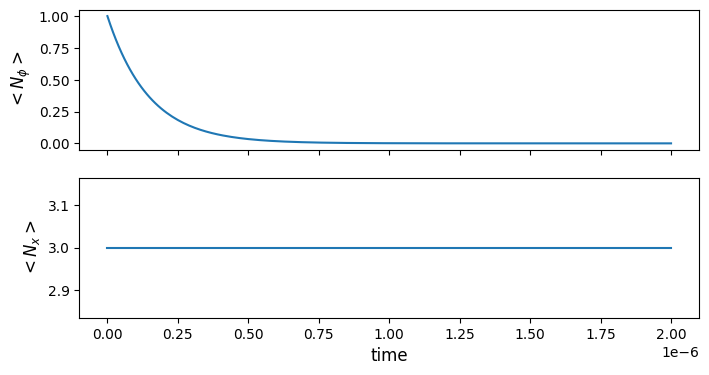

In [19]:

p_ex_X = []
p_ex_Phi = []
'''
f_modes0, f_energies = floquet_modes(H, T)
f_coeff = floquet_state_decomposition(f_modes0, f_energies, psi0)
fmodes_table = floquet_modes_table(f_modes0, f_energies, t_eval, H, T)
for i, t in enumerate(t_eval):
    psi_t = floquet_wavefunction(fmodes_table[i], f_energies, f_coeff, t)
    print(psi_t)
    p_ex_Phi.append(expect(tensor(count_phi), psi_t[0]))

# fsesolve 4 dim, T = 2 Pi / Wradial, 50 steps, 13.9s

fse_result = fsesolve(
    H,
    psi0,
    tlist = t_eval,
    #spectra_cb= [],
    e_ops=[count_phi, count_x],
    T=T,
    args={},
)
'''

'''
The Bloch-Redfield formalism: https://qutip.org/docs/latest/guide/dynamics/dynamics-bloch-redfield.html

1. relate to system to the the noise-power spectrum of the environment.
2.  perturbative master equation
'''
# brmesolve 4 dim, 6.9s
progress_bar = BaseProgressBar()
c_ops = []
nth = 0
kappa = 2 * np.pi * fres / Q
c_ops.append(np.sqrt(kappa * (1 + nth)) * anni_phi)
c_ops.append(np.sqrt(kappa * nth) * anni_phi.dag())
brme_result = brmesolve(H, psi0, t_eval, e_ops = [count_phi, count_x],  c_ops = c_ops, progress_bar=progress_bar)

# Plot the expectation values
plot_expectation_values(brme_result, ylabels=["$<N_\phi>$", "$<N_x>$"])


'''
Monte Carlo

c_ops = []
nth = 3.858
kappa = 2 * np.pi * fres / Q
c_ops.append(np.sqrt(kappa * (1 + nth)) * anni_phi)
c_ops.append(np.sqrt(kappa * nth) * anni_phi.dag())
ntraj = [1, 5, 15, 904]  # number of MC trajectories
mc = mcsolve(H, psi0, t_eval, c_ops, e_ops = [count_phi, count_x], ntraj = ntraj)
me = mesolve(H, psi0, t_eval, c_ops, e_ops = [count_phi, count_x])
fig = plt.figure(figsize=(8, 8), frameon=False)
plt.subplots_adjust(hspace=0.0)

for i in range(4):
    ax = plt.subplot(4, 1, i + 1)
    ax.plot(
        t_eval, mc.expect[i][0], "b", lw=2,
        label="#trajectories={}".format(ntraj[i])
    )
    ax.plot(t_eval, me.expect[0], "r--", lw=2)
    ax.set_yticks([0, 0.5, 1])
    ax.set_ylim([-0.1, 5.1])
    ax.set_ylabel(r"$\langle P_{1}(t)\rangle$")
    ax.legend()

ax.set_xlabel(r"Time (s)")
plt.show()
'''



In [20]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.1
Numpy Version:      1.24.1
Scipy Version:      1.10.0
Cython Version:     0.29.33
Matplotlib Version: 3.6.3
Python Version:     3.8.16
Number of CPUs:     20
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Windows (AMD64)
Installation path:  c:\Users\electron\miniconda3\envs\e\lib\site-packages\qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily ge

MC 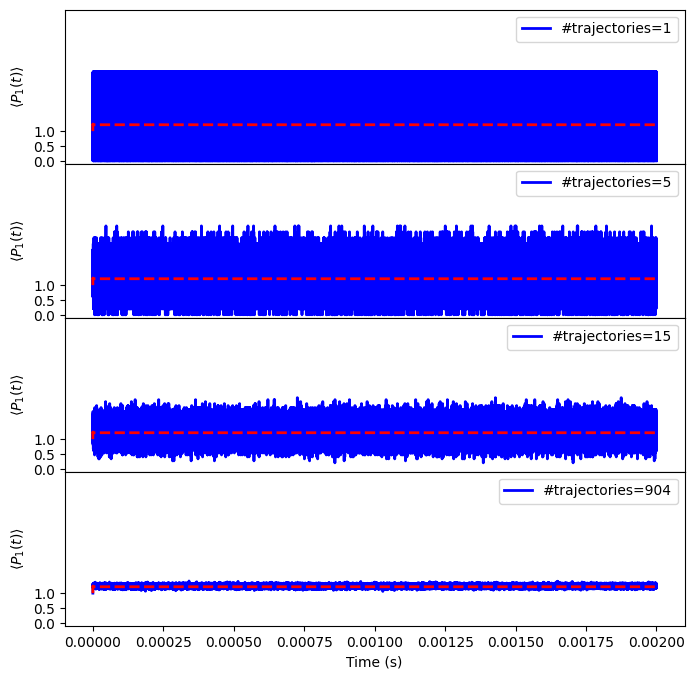

Brmesolve 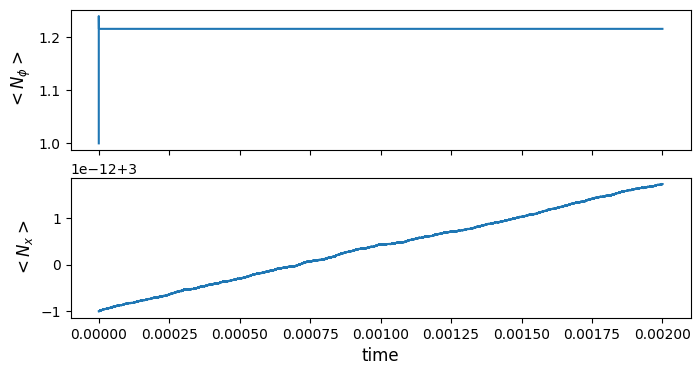